In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [76]:
df = pd.read_csv("bank_notes.csv")
TARGET = "Target"
df

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [48]:
df.isna().sum().sum() + df.isnull().sum().sum()

0

In [49]:
df.duplicated().sum()

24

In [50]:
def get_X_y(df):
    return df.drop(columns=[TARGET]), df[TARGET]

In [51]:
def preprocess(df):
    df = df.copy(deep=True)

    # Dropping duplicates that we checked for
    df.drop_duplicates(inplace=True)
    
    # Normalization
    X, y = get_X_y(df)
    df = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)
    df[TARGET] = y

    return df

def pca_transform_df(df, pca: PCA):
    df = df.copy(deep=True)

    X, y = get_X_y(df)
    transformed_X = pca.transform(X)

    df = pd.DataFrame(transformed_X, columns=["PC1", "PC2"], index=X.index)
    df[TARGET] = y

    return df

In [52]:
df = preprocess(df)
pca = PCA(n_components=2, random_state=42).fit(get_X_y(df)[0])
df = pca_transform_df(df, pca)

In [53]:
X, y = get_X_y(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
NO_OF_CLUSTERS = len(df[TARGET].unique())
kmeans = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=42, n_init='auto').fit(X_train)
y_pred = kmeans.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       147
           1       0.54      0.63      0.58       123

    accuracy                           0.59       270
   macro avg       0.59      0.59      0.59       270
weighted avg       0.59      0.59      0.59       270



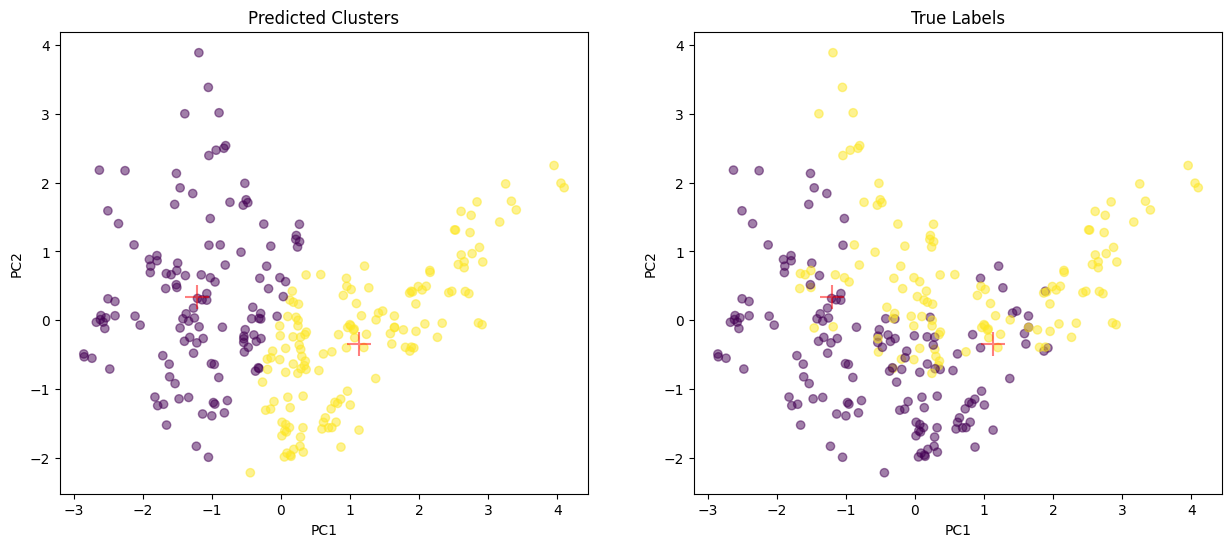

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
centers = kmeans.cluster_centers_

# Plot the predicted clusters
ax[0].scatter(X_test["PC1"], X_test["PC2"], c=y_pred, cmap='viridis', alpha=0.5)
ax[0].scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5, marker='+')
ax[0].set_title('Predicted Clusters')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

# Plot the true labels
ax[1].scatter(X_test["PC1"], X_test["PC2"], c=y_test, cmap='viridis', alpha=0.5)
ax[1].scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5, marker='+')
ax[1].set_title('True Labels')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()